In [14]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [15]:
np.random.seed(0)

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [18]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of images are not 28x28"

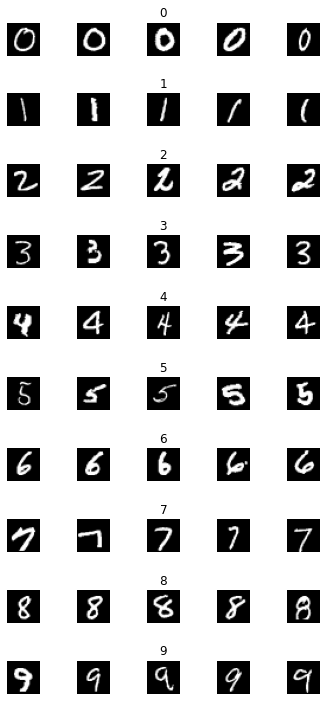

In [19]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
            

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

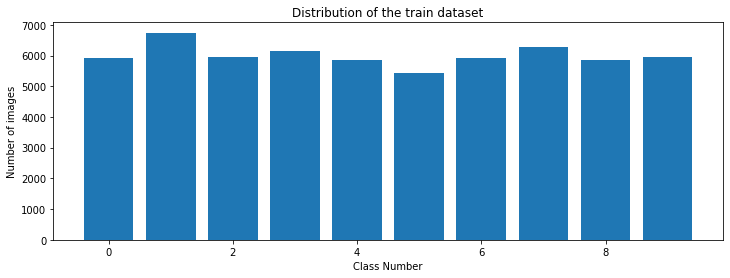

In [20]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [21]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [24]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics='accuracy')
    return model

In [25]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size = 200, verbose=1, shuffle = 1)

Epoch 1/100
270/270 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.8241 - val_loss: 0.2713 - val_accuracy: 0.9245
Epoch 2/100
270/270 [==============================] - 0s 1ms/step - loss: 0.3007 - accuracy: 0.9124 - val_loss: 0.2517 - val_accuracy: 0.9255
Epoch 3/100
270/270 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.9193 - val_loss: 0.2276 - val_accuracy: 0.9315
Epoch 4/100
270/270 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.9256 - val_loss: 0.2194 - val_accuracy: 0.9367
Epoch 5/100
270/270 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.9282 - val_loss: 0.2048 - val_accuracy: 0.9427
Epoch 6/100
270/270 [==============================] - 0s 1ms/step - loss: 0.2336 - accuracy: 0.9316 - val_loss: 0.2027 - val_accuracy: 0.9417
Epoch 7/100
270/270 [==============================] - 0s 1ms/step - loss: 0.2313 - accuracy: 0.9323 - val_loss: 0.2114 - val_accuracy: 0.9380

Text(0.5, 0, 'epoch')

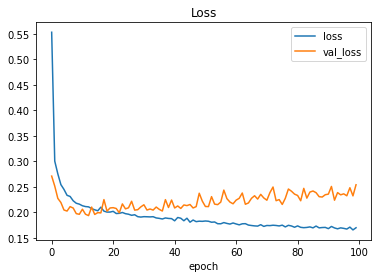

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score: ', score[0])
print('Test accuracy: ', score[1])

<class 'list'>
Test Score:  0.27514562010765076
Test accuracy:  0.9276000261306763


# Model Predict

<Response [200]>


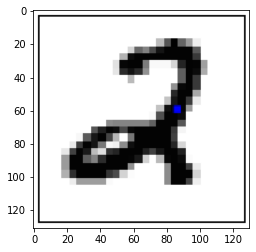

In [32]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

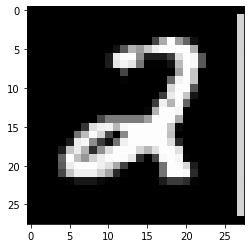

In [42]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [43]:
image = image/255
image = image.reshape(1, 784)

(1, 784)


In [44]:
prediction = model.predict_classes(image)
print('Predicted digit: ', str(prediction))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predicted digit:  [2]
